In [1]:
try:
    from datascience import Table
    print("The module `datascience` is installed on your project.")
except ModuleNotFoundError:
    import sys
    print("The module `datascience` is not installed.")
    print("To install it for your CoCalc project, use the [(+) New] menu to")
    print("open a Linux terminal.")
    print("Then copy-paste the line below into the terminal and hit [Enter].")
    print()
    print(f"{sys.executable} -m pip install --user datascience")
    

The module `datascience` is installed on your project.


In [2]:
pizza_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/gt/pizzaplace.csv'
pizza_table = Table.read_table(pizza_url)

In [3]:
pizza_table.where("date","2015-07-22").sort("size").show(10)

Unnamed: 0,id,date,time,name,size,type,price
28062,2015-012116,2015-07-22,11:39:20,five_cheese,L,veggie,18.5
28066,2015-012117,2015-07-22,11:52:09,thai_ckn,L,chicken,20.75
28069,2015-012119,2015-07-22,11:57:15,spicy_ital,L,supreme,20.75
28075,2015-012121,2015-07-22,12:11:14,ital_supr,L,supreme,20.75
28078,2015-012121,2015-07-22,12:11:14,mexicana,L,veggie,20.25
28082,2015-012125,2015-07-22,12:42:32,five_cheese,L,veggie,18.5
28090,2015-012128,2015-07-22,13:01:06,mexicana,L,veggie,20.25
28092,2015-012130,2015-07-22,13:01:31,spicy_ital,L,supreme,20.75
28093,2015-012131,2015-07-22,13:03:01,southw_ckn,L,chicken,20.75
28095,2015-012133,2015-07-22,13:11:08,classic_dlx,L,classic,20.5


In [4]:
with open("peterpan.txt") as book_file:
    book_string = book_file.read() # saves contents of the text file to a string
    book_chapters = book_string.split("Chapter ")[1:] # makes list of strings for each chapter
    book_table = Table().with_column("Chapter", book_chapters) # creates table of chapters
    book_table.show() # displays table

Chapter
"1 PETER BREAKS THROUGH All children, except one, grow u ..."
"2 THE SHADOW Mrs. Darling screamed, and, as if in answe ..."
"3 COME AWAY, COME AWAY! For a moment after Mr. and Mrs. ..."
"4 THE FLIGHT “Second to the right, and straight on till ..."
5 THE ISLAND COME TRUE Feeling that Peter was on his wa ...
6 THE LITTLE HOUSE Foolish Tootles was standing like a ...
7 THE HOME UNDER THE GROUND One of the first things Pet ...
8 THE MERMAIDS' LAGOON If you shut your eyes and are a ...
9 THE NEVER BIRD The last sound Peter heard before he w ...
10 THE HAPPY HOME One important result of the brush [wi ...


In [5]:
book_table = book_table.with_columns([
    "Peter Pan", [c.count("Peter") for c in book_chapters],
    "Tinker Bell", [c.count("Tink") for c in book_chapters],
    "Wendy", [c.count("Wendy") for c in book_chapters],
    "John", [c.count("John") for c in book_chapters],
    "Michael", [c.count("Michael") for c in book_chapters],
])
book_table.sort("Tinker Bell").show()

Chapter,Peter Pan,Tinker Bell,Wendy,John,Michael
"1 PETER BREAKS THROUGH All children, except one, grow u ...",9,0,28,11,10
"2 THE SHADOW Mrs. Darling screamed, and, as if in answe ...",4,0,16,9,25
8 THE MERMAIDS' LAGOON If you shut your eyes and are a ...,34,0,28,4,4
9 THE NEVER BIRD The last sound Peter heard before he w ...,13,0,2,0,0
12 THE CHILDREN ARE CARRIED OFF The pirate attack had b ...,8,0,1,0,0
14 THE PIRATE SHIP One green light squinting over Kidd' ...,3,0,8,9,5
15 “HOOK OR ME THIS TIME” Odd things happen to all of u ...,31,0,5,2,1
7 THE HOME UNDER THE GROUND One of the first things Pet ...,13,5,17,6,7
10 THE HAPPY HOME One important result of the brush [wi ...,26,5,27,5,6
16 THE RETURN HOME By three bells that morning they wer ...,7,5,25,15,10


In [6]:
pizza_table.where("date","2015-01-03").sort("price",descending=False).show(10)

Unnamed: 0,id,date,time,name,size,type,price
330,2015-000137,2015-01-03,11:34:10,pepperoni,S,classic,9.75
452,2015-000188,2015-01-03,20:08:39,pepperoni,S,classic,9.75
375,2015-000152,2015-01-03,15:09:42,hawaiian,S,classic,10.5
393,2015-000161,2015-01-03,16:43:46,hawaiian,S,classic,10.5
359,2015-000144,2015-01-03,13:44:28,pep_msh_pep,S,classic,11
456,2015-000190,2015-01-03,20:14:23,pep_msh_pep,S,classic,11
342,2015-000143,2015-01-03,13:41:36,classic_dlx,S,classic,12
356,2015-000144,2015-01-03,13:44:28,big_meat,S,classic,12
362,2015-000145,2015-01-03,13:53:48,the_greek,S,classic,12
367,2015-000148,2015-01-03,14:40:42,mediterraneo,S,veggie,12


In [7]:

table = Table().with_columns(
    'test1', [92.5, 88, 72, 71, 99, 100, 95, 83, 94, 93],
    'test2', [89, 84, 74, 66, 92, 99, 88, 81, 95, 94],
)
table.show()
table.boxplot()

test1,test2
92.5,89
88,84
72,74
71,66
99,92
100,99
95,88
83,81
94,95
93,94


In [8]:
from math import floor
pizza_table.with_column("floored",pizza_table.apply(floor,"price")).show(10)


Unnamed: 0,id,date,time,name,size,type,price,floored
1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,13
2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16,16
3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16,16
4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,20
5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.5,18
6,2015-000002,2015-01-01,11:57:40,ital_supr,L,supreme,20.75,20
7,2015-000003,2015-01-01,12:12:28,prsc_argla,L,supreme,20.75,20
8,2015-000003,2015-01-01,12:12:28,ital_supr,M,supreme,16.5,16
9,2015-000004,2015-01-01,12:16:31,ital_supr,M,supreme,16.5,16
10,2015-000005,2015-01-01,12:21:30,ital_supr,M,supreme,16.5,16


In [9]:
ps = pizza_table.where('date','2015-11-03').apply(floor,"price")[:20]
print(ps.__repr__())
for p in ps:
    print(f"<cell>{p}</cell>")


array([20, 20, 20, 16, 20, 20, 11, 12, 16, 10, 20, 16, 20, 12, 20, 12, 12,
       11, 20, 16])
<cell>20</cell>
<cell>20</cell>
<cell>20</cell>
<cell>16</cell>
<cell>20</cell>
<cell>20</cell>
<cell>11</cell>
<cell>12</cell>
<cell>16</cell>
<cell>10</cell>
<cell>20</cell>
<cell>16</cell>
<cell>20</cell>
<cell>12</cell>
<cell>20</cell>
<cell>12</cell>
<cell>12</cell>
<cell>11</cell>
<cell>20</cell>
<cell>16</cell>


In [10]:
ps = pizza_table.where('date','2015-04-01').apply(floor,"price")
print(ps.__repr__())
#for p in ps:
#    print(f"<cell>{p}</cell>")


array([16, 20, 12, 12, 14, 15, 15, 20, 20, 15, 20, 20, 17, 25, 14, 12, 16,
       16, 18, 20, 16, 20, 20, 16, 12, 16, 17, 12, 18, 12, 20, 25,  9, 16,
       12, 16, 20, 16, 12, 12, 16, 20, 12, 16, 10, 12, 12, 20, 16, 16, 12,
       16, 12, 12, 16, 16, 10, 20, 20,  9, 18, 20, 15, 20, 16, 20, 11, 20,
       16, 12, 16, 20, 16, 12, 16, 12, 16, 20, 12, 16, 16, 20, 12, 12, 12,
       13, 12, 16, 12, 12, 12, 16, 20, 20, 20, 20, 12, 20, 12, 18, 16, 20,
       20, 12, 12, 20, 17, 16, 16, 20, 14, 12, 12, 16, 20, 18, 11, 16, 12,
       16, 18, 16,  9, 20, 16, 16, 12, 12, 16, 20, 12, 16, 12, 12, 18])


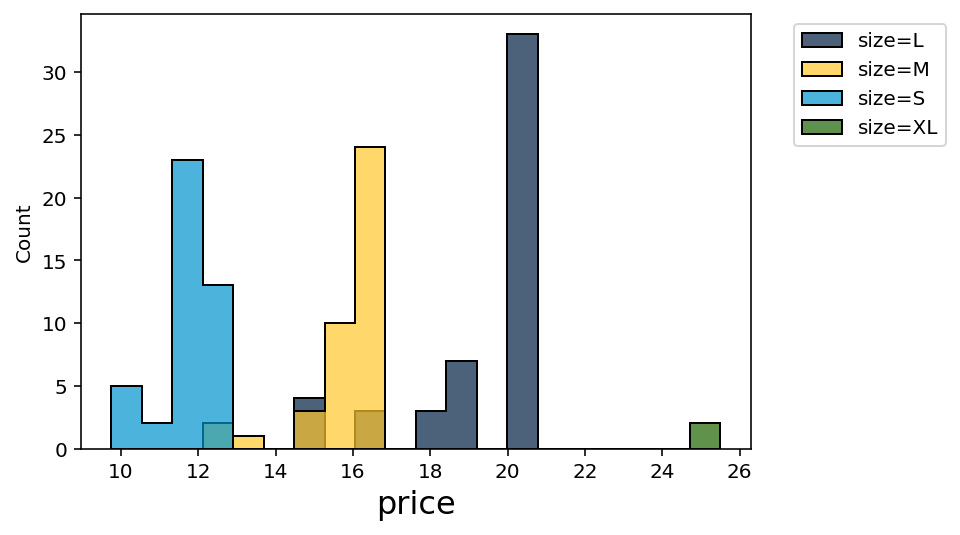

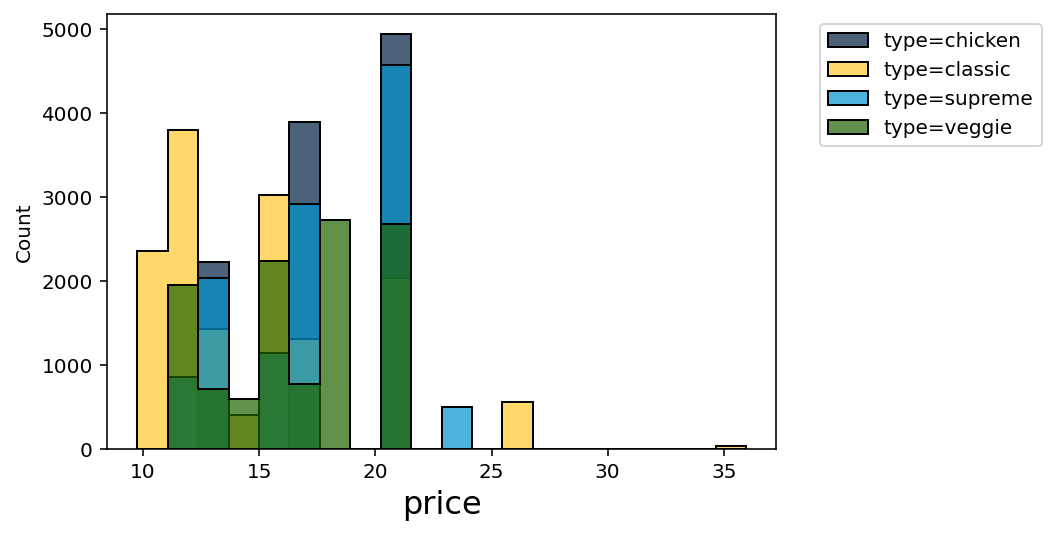

In [11]:
import matplotlib
%matplotlib inline
pizza_table = pizza_table.with_column("dollar_price",pizza_table.apply(floor,"price"))
pizza_table.where("date","2015-04-01").select("size","price").hist(group="size",bins=20,normed=False)
pizza_table.select("type","price").hist(group="type",bins=20,normed=False)

In [12]:
def show_histogram(table,column,bin_width=1):
    from numpy import arange
    from datascience import Table
    data = table.column(column)
    t = Table().with_columns(column,data)
    t.hist(bins=arange(min(data),max(data)+bin_width,bin_width),normed=False)


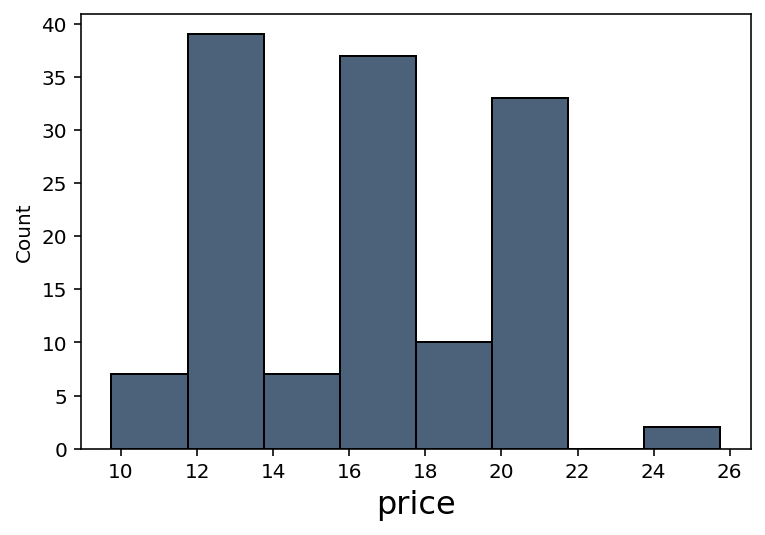

In [13]:

show_histogram(pizza_table.where("date","2015-04-01"),"price",2)

In [14]:
pizza_table.stats().show()

statistic,Unnamed: 0,id,date,time,name,size,type,price,dollar_price
min,1,2015-000001,2015-01-01,09:52:21,bbq_ckn,L,chicken,9.75,9
max,49574,2015-021350,2015-12-31,23:05:52,veggie_veg,XXL,veggie,35.95,35
median,24787.5,,,,,,,16.5,16
sum,1.22882e+09,,,,,,,817860,795200


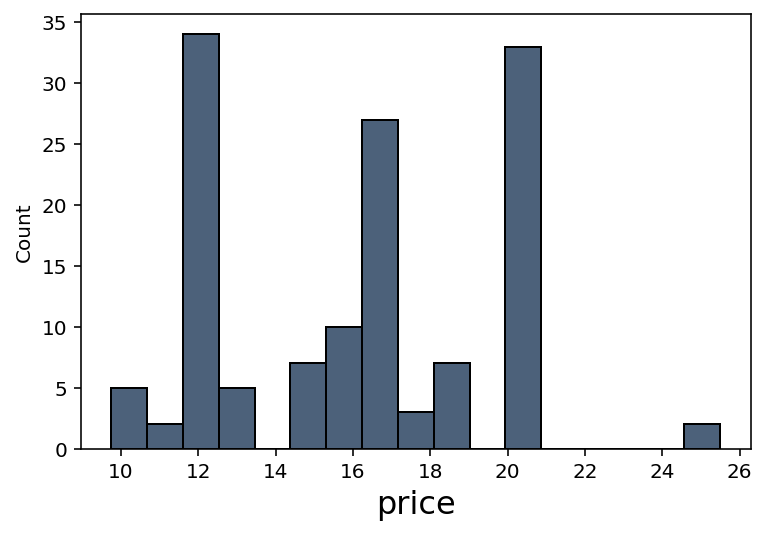

In [15]:
pizza_table.where("date","2015-04-01").select("price").hist(bins=17,normed=False)

Oct 09 Pizza Prices


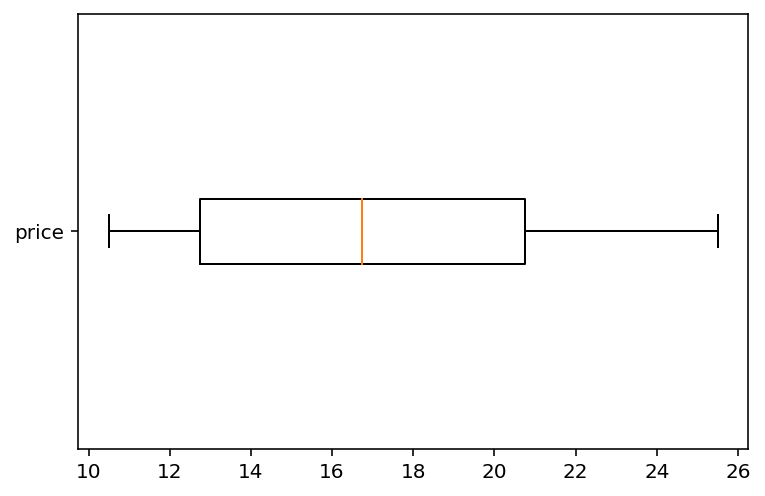

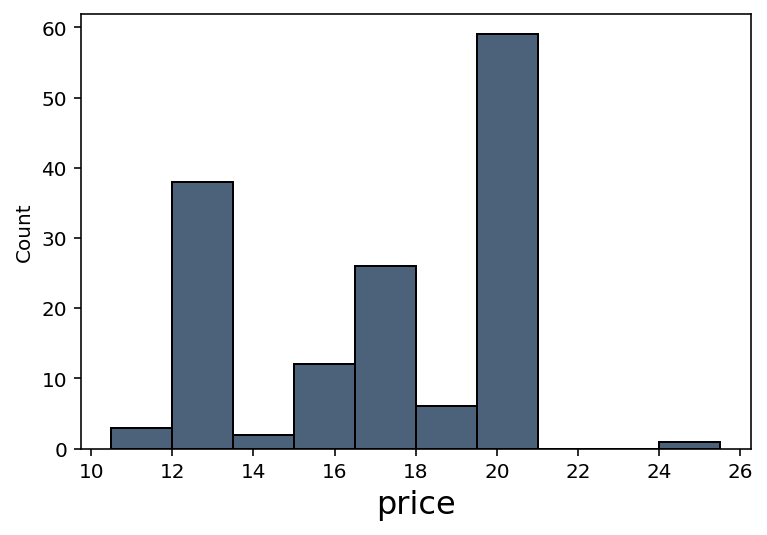

In [16]:
print("Oct 09 Pizza Prices")
pizza_table.where("date","2015-10-09").select("price").boxplot(vert=False)
pizza_table.where("date","2015-10-09").select("price").hist(normed=False)


Oct 10 Pizza Prices


Unnamed: 0,id,date,time,name,size,type,price,dollar_price
38687,2015-016753,2015-10-10,17:54:55,the_greek,XXL,classic,35.95,35
38736,2015-016773,2015-10-10,21:03:54,brie_carre,S,supreme,23.65,23
38620,2015-016722,2015-10-10,11:37:09,bbq_ckn,L,chicken,20.75,20
38622,2015-016723,2015-10-10,11:48:27,peppr_salami,L,supreme,20.75,20
38623,2015-016724,2015-10-10,12:02:47,peppr_salami,L,supreme,20.75,20
38628,2015-016728,2015-10-10,13:01:01,thai_ckn,L,chicken,20.75,20
38633,2015-016730,2015-10-10,13:46:02,ital_supr,L,supreme,20.75,20
38635,2015-016730,2015-10-10,13:46:02,ckn_pesto,L,chicken,20.75,20
38637,2015-016730,2015-10-10,13:46:02,thai_ckn,L,chicken,20.75,20
38644,2015-016732,2015-10-10,14:05:27,ital_supr,L,supreme,20.75,20


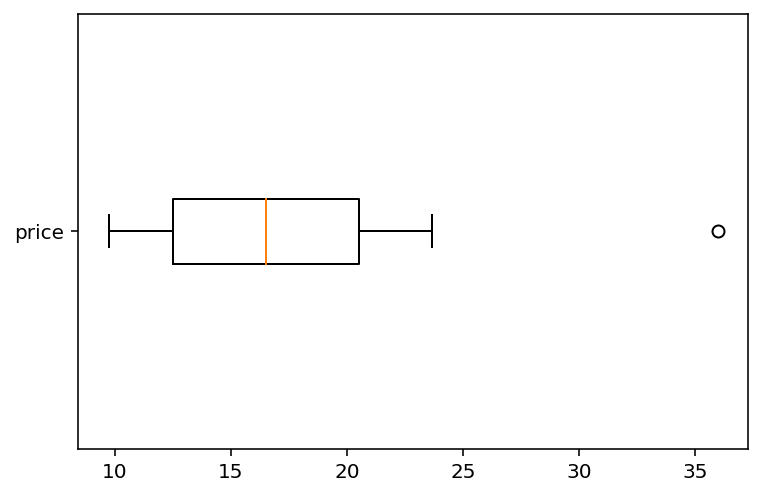

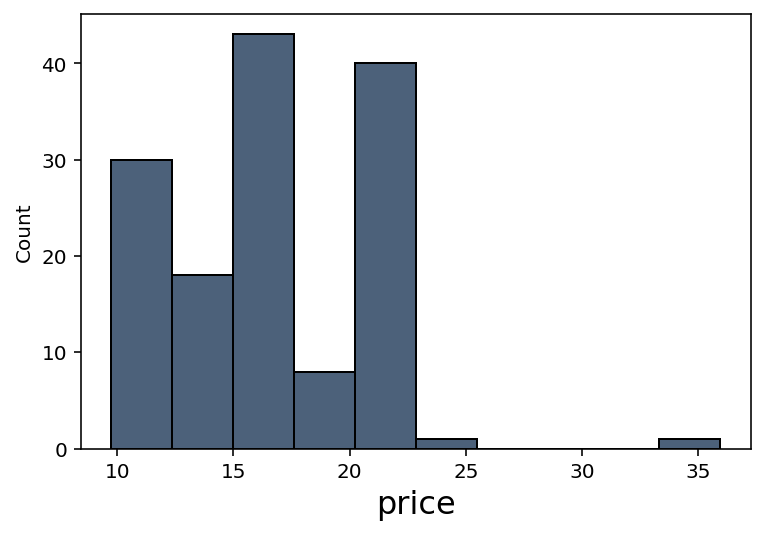

In [17]:
print("Oct 10 Pizza Prices")
pizza_table.where("date","2015-10-10").select("price").boxplot(vert=False)
pizza_table.where("date","2015-10-10").select("price").hist(normed=False)
pizza_table.where("date","2015-10-10").sort("price",descending=True)


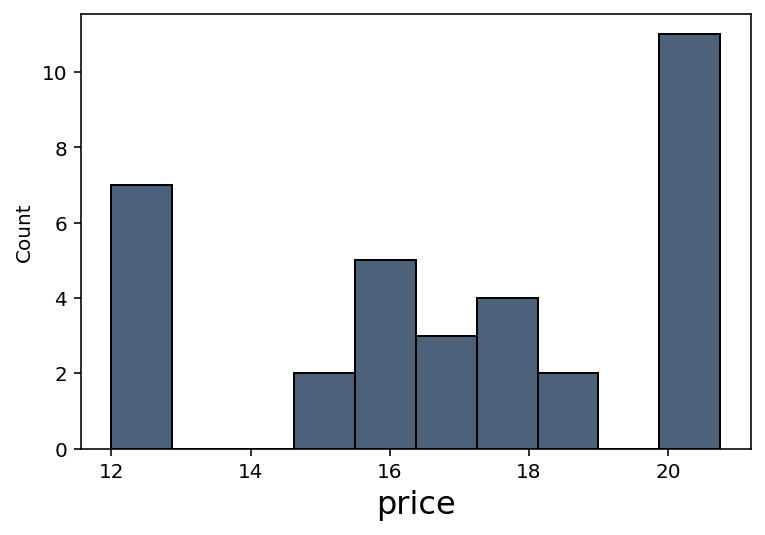

In [18]:
pizza_table.where("date","2015-05-06").where("type","veggie").column("dollar_price")

pizza_table.where("date","2015-05-06").where("type","veggie").select("price").hist(normed=False,bins=10)

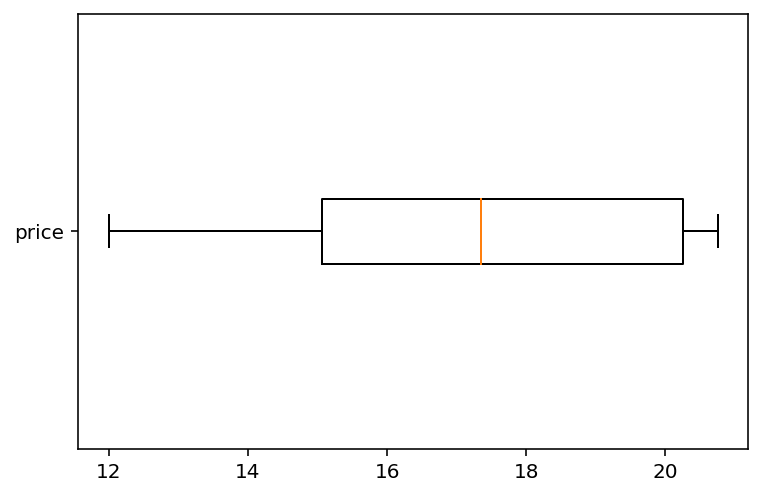

In [19]:


pizza_table.where("date","2015-05-06").where("type","veggie").select("price").boxplot(vert=False)

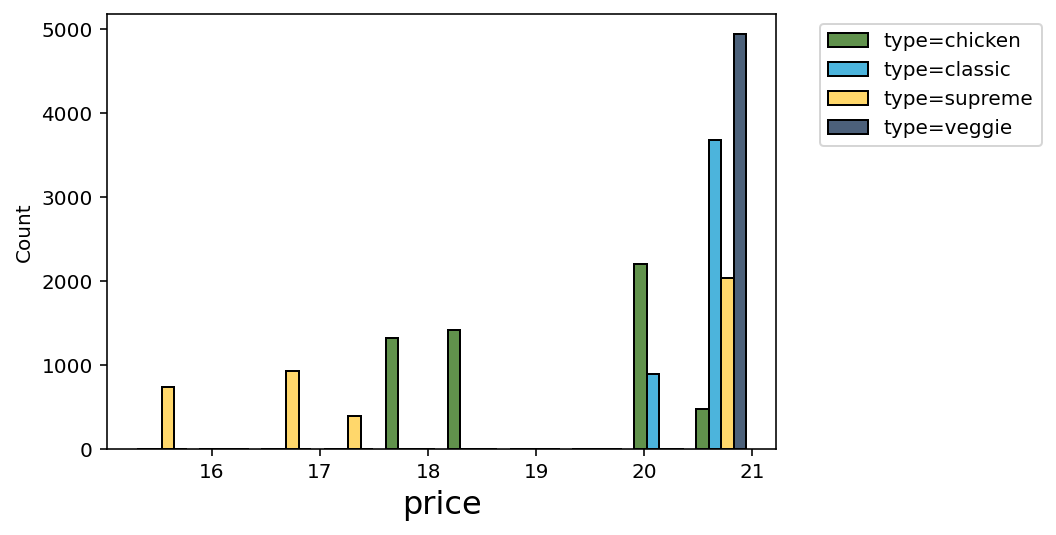

In [20]:
pizza_table.where("size","L").select("type","price").hist(group="type",side_by_side=True,normed=False)

type,count
chicken,31
classic,42
supreme,28
veggie,27


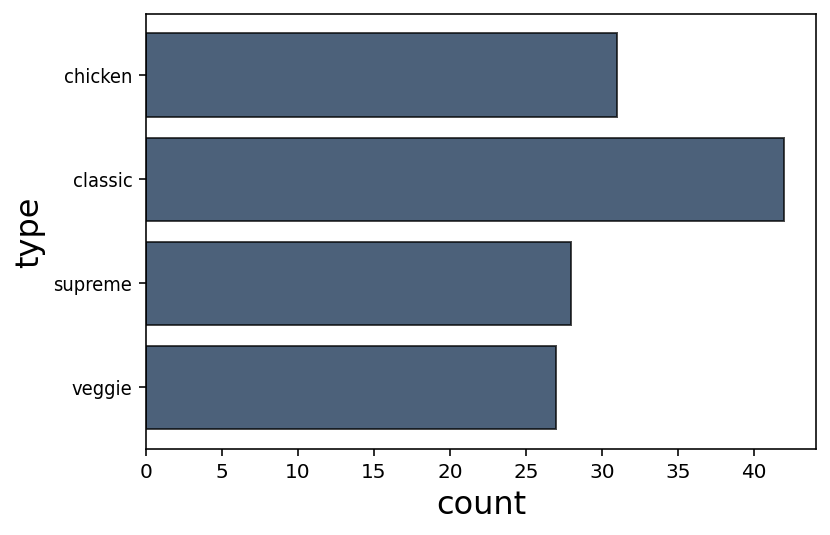

In [21]:
cs = pizza_table.where("date","2015-06-20").group("type")
cs.show()
cs.barh("type")


In [22]:
# converts `date` string into a native datetime format
from datetime import datetime
pizza_table = pizza_table.with_column("datetime",pizza_table.apply(
    lambda x:datetime.strptime(x,"%Y-%m-%d"),"date"
))

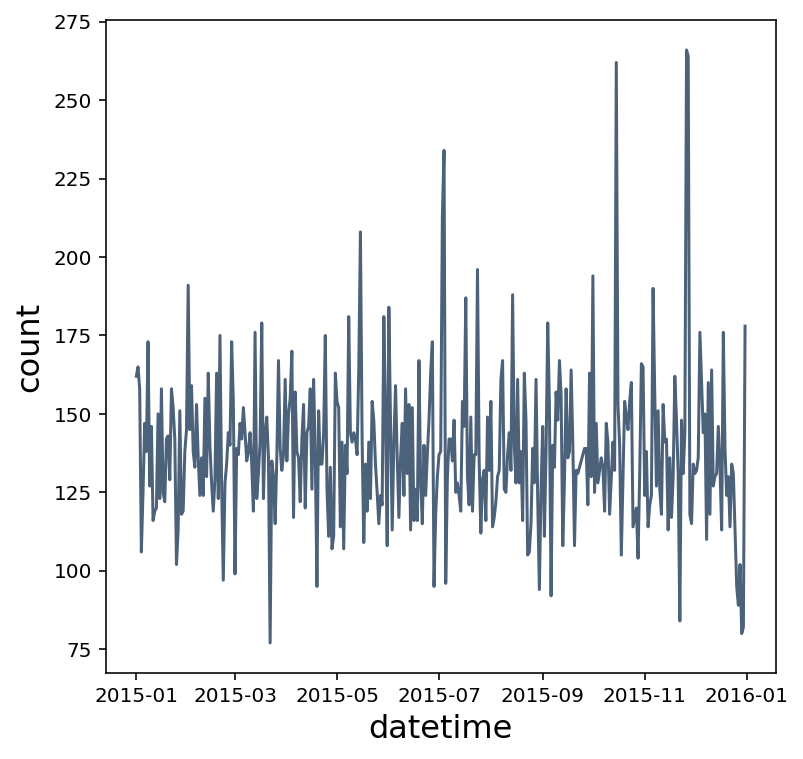

In [23]:
# .plot("datetime") creates a line chart with the datetime column on the
# horizontal axis, and other numerical columns (in this case counts)
# on the vertical axis
pizza_table.select("datetime","price").group("datetime").plot("datetime")


Unnamed: 0,id,date,time,name,size,type,price,dollar_price,datetime
1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,13,2015-01-01 00:00:00
2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16,16,2015-01-01 00:00:00
3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16,16,2015-01-01 00:00:00
4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,20,2015-01-01 00:00:00
5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.5,18,2015-01-01 00:00:00
6,2015-000002,2015-01-01,11:57:40,ital_supr,L,supreme,20.75,20,2015-01-01 00:00:00
7,2015-000003,2015-01-01,12:12:28,prsc_argla,L,supreme,20.75,20,2015-01-01 00:00:00
8,2015-000003,2015-01-01,12:12:28,ital_supr,M,supreme,16.5,16,2015-01-01 00:00:00
9,2015-000004,2015-01-01,12:16:31,ital_supr,M,supreme,16.5,16,2015-01-01 00:00:00
10,2015-000005,2015-01-01,12:21:30,ital_supr,M,supreme,16.5,16,2015-01-01 00:00:00


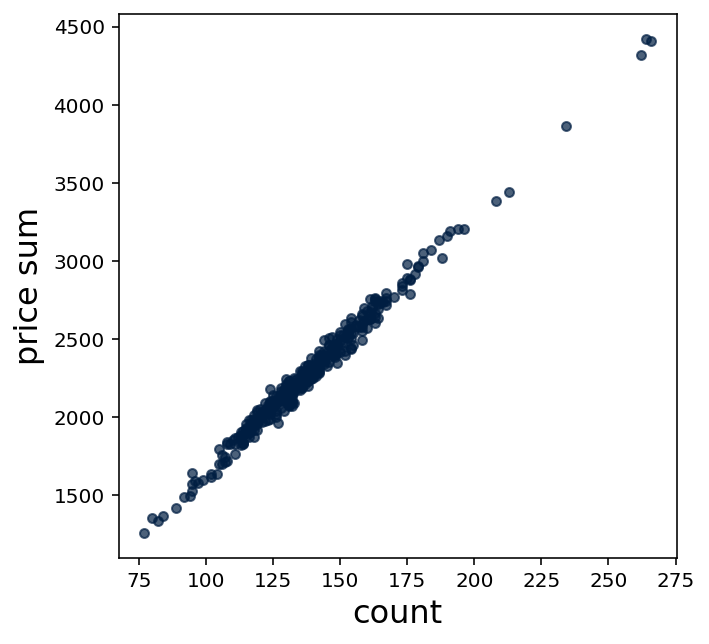

In [24]:
pizza_table.group("date").join("date",pizza_table.group("date",sum)).select("count","price sum").scatter("count")
pizza_table.show(10)

In [25]:
testing_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/MathPlacement.csv'
testing_table = Table.read_table(testing_url)
testing_table.show(10)

Unnamed: 0,Student,Gender,PSATM,SATM,ACTM,Rank,Size,GPAadj,PlcmtScore,Recommends,Course,Grade,RecTaken,TooHigh,TooLow,CourseSuccess
1,625,0,56,56,25,1,420,40,23,R0,210,A,1,0,0,1
2,628,0,57,nan,23,1,85,40,21,R0,117,A,1,0,0,1
3,629,1,nan,62,27,42,421,38,20,R0,117,A-,1,0,0,1
4,630,0,53,nan,27,6,75,38,20,R0,117,B,1,0,0,1
5,634,1,nan,64,31,72,462,35,19,R0,114,A,1,0,0,1
6,636,0,63,68,nan,96,518,34,18,R0,117,B+,1,0,0,1
7,638,0,42,nan,23,38,382,37,18,R0,117,A-,1,0,0,1
8,641,0,52,nan,24,72,480,37,17,R0,117,B+,1,0,0,1
9,643,0,51,58,nan,51,703,34,17,R0,117,A-,1,0,0,1
10,645,0,60,nan,26,215,524,32,16,R0,117,B,1,0,0,1


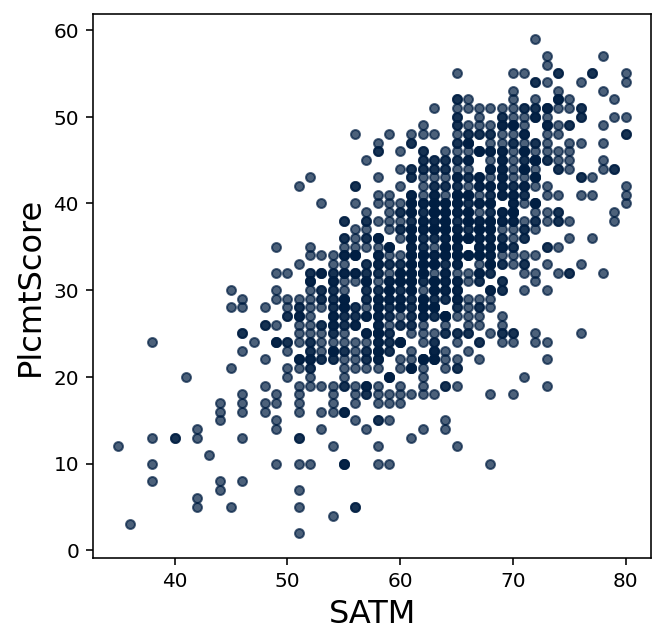

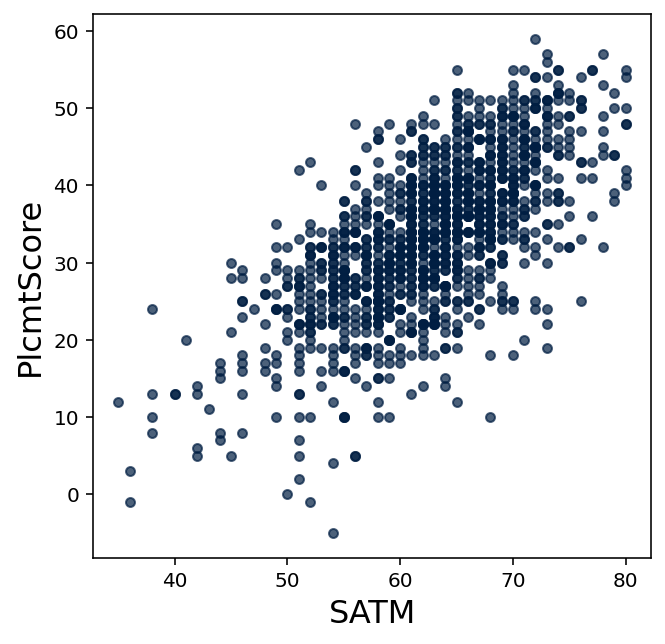

In [26]:
from datascience.predicates import are
testing_table.where("PlcmtScore",are.above(0)).where("SATM",are.above(0)).select("SATM","PlcmtScore").scatter("SATM")
testing_table.select("PlcmtScore","SATM").scatter("SATM")

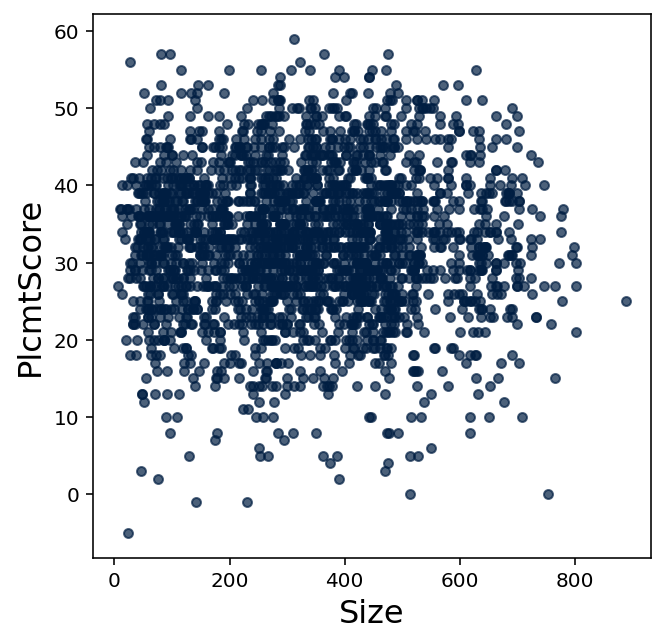

In [27]:
testing_table.where("Size",are.above(0)).select("Size","PlcmtScore").scatter("Size")

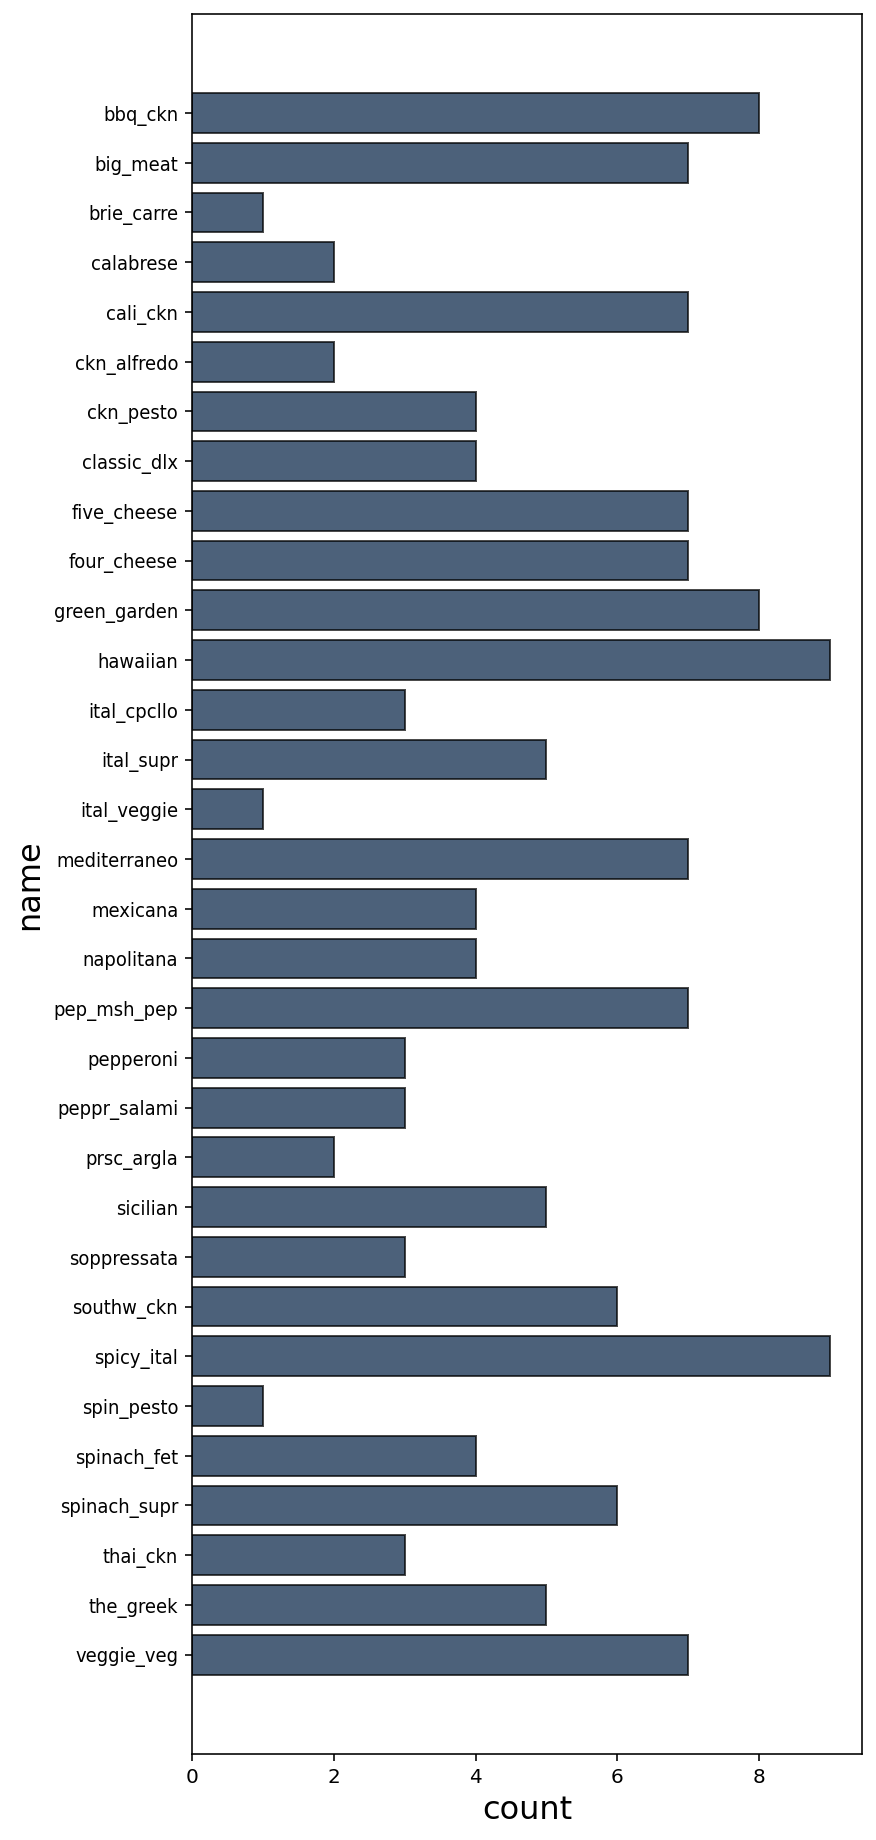

In [28]:
pizza_table.where("date","2015-02-28").group("name").barh("name")

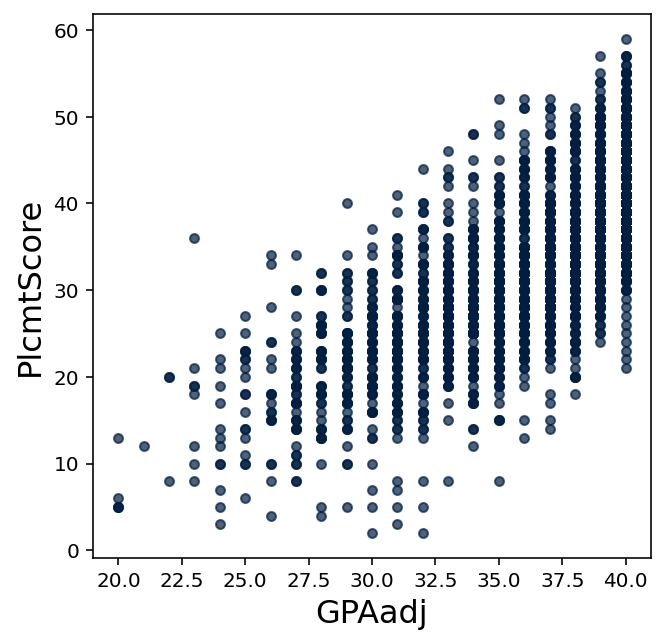

In [29]:
testing_table.where("GPAadj",are.above(0)).where("PlcmtScore",are.above(0)).select("GPAadj","PlcmtScore").scatter("GPAadj")

In [30]:
prices = pizza_table.where("date","2015-11-09").column("price")
len(prices)/sum(prices)

0.060795168595873174

In [31]:
from statistics import mean,mode,multimode,median
print(mean([3,2,6,5,5,11,2,7]))
print(mode([3,2,6,5,5,10,2,7]))
print(multimode([3,2,6,5,5,10,2,7]))

5.125
2
[2, 5]


In [32]:
median([3,2,6,5,5,10,2,7])

5.0

In [33]:
prices = pizza_table.where("date","2015-10-09").column("price")
print(mean(prices))
print(multimode(prices))
print(median(prices))
pizza_table.where("date","2015-10-09").show(10)

17.092517006802723
[20.75]
16.75


Unnamed: 0,id,date,time,name,size,type,price,dollar_price,datetime
38473,2015-016662,2015-10-09,11:35:26,classic_dlx,S,classic,12,12,2015-10-09 00:00:00
38474,2015-016663,2015-10-09,12:03:21,spinach_fet,L,veggie,20.25,20,2015-10-09 00:00:00
38475,2015-016663,2015-10-09,12:03:21,pepperoni,L,classic,15.25,15,2015-10-09 00:00:00
38476,2015-016664,2015-10-09,12:04:03,cali_ckn,L,chicken,20.75,20,2015-10-09 00:00:00
38477,2015-016665,2015-10-09,12:05:45,bbq_ckn,L,chicken,20.75,20,2015-10-09 00:00:00
38478,2015-016665,2015-10-09,12:05:45,cali_ckn,L,chicken,20.75,20,2015-10-09 00:00:00
38479,2015-016665,2015-10-09,12:05:45,soppressata,S,supreme,12.5,12,2015-10-09 00:00:00
38480,2015-016666,2015-10-09,12:09:28,southw_ckn,S,chicken,12.75,12,2015-10-09 00:00:00
38481,2015-016667,2015-10-09,12:15:09,five_cheese,L,veggie,18.5,18,2015-10-09 00:00:00
38482,2015-016667,2015-10-09,12:15:09,five_cheese,L,veggie,18.5,18,2015-10-09 00:00:00


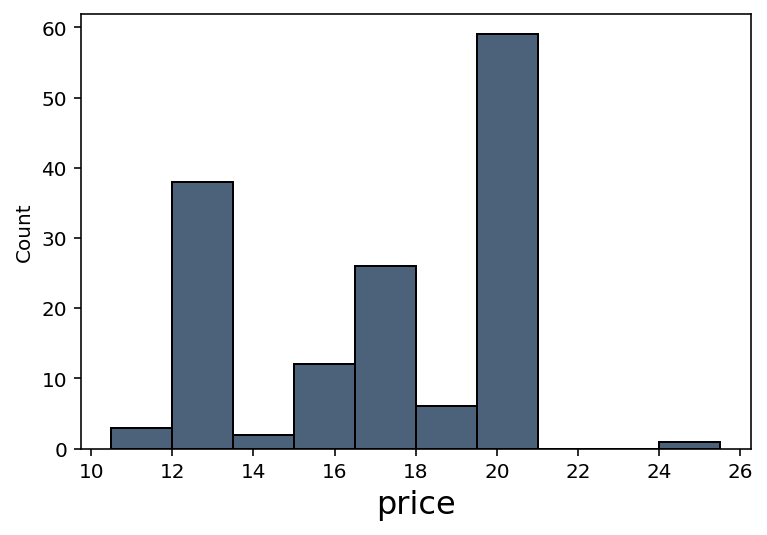

In [34]:

pizza_table.where("date","2015-10-09").select("price").hist(normed=False)

13.25
12.0
14.780568242880172


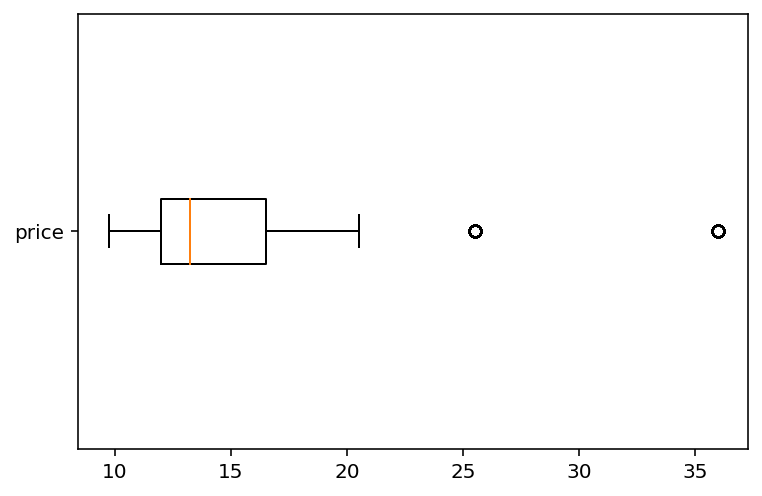

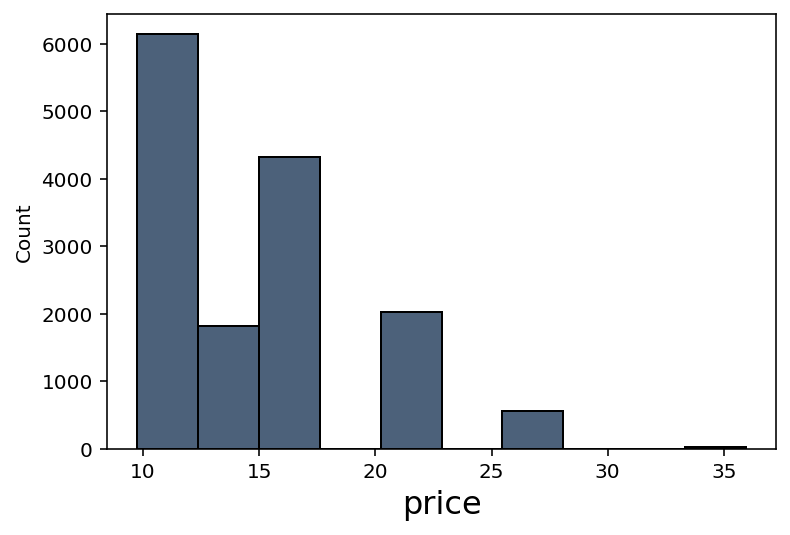

In [35]:


pizza_table.where("type","classic").select("price").boxplot(vert=False)
pizza_table.where("type","classic").select("price").hist(normed=False)
print(median(pizza_table.where("type","classic").column("price")))
print(mode(pizza_table.where("type","classic").column("price")))
print(mean(pizza_table.where("type","classic").column("price")))

In [36]:
from random import randrange
a=1
b=1
c=1
while a==b or b==c or a==c:
    ns = [randrange(1,10) for _ in range(9)]
    a = mode(ns)
    b = median(ns)
    c = mean(ns)
print(ns)
print(mode(ns))
print(median(ns))
print(mean(ns))

[6, 3, 1, 9, 3, 5, 6, 3, 7]
3
5
4.777777777777778


In [37]:
ns = [13, 12, 11, 10, 10, 14, 13, 10, 10, 14, 15, 11, 11, 13, 15, 15, 13, 15, 14, 11] # [randrange(10,16) for _ in range(20)]
ms = [19, 12, 13, 9, 15, 5, 6, 12, 5, 14, 8, 20, 19, 15, 13, 13, 14, 14, 7, 17] # [randrange(5,21) for _ in range(20)]
print(ns)
print(median(ns))
print(mean(ns))
print(mode(ns))
print(ms)
print(median(ms))
print(mean(ms))
print(mode(ms))

[13, 12, 11, 10, 10, 14, 13, 10, 10, 14, 15, 11, 11, 13, 15, 15, 13, 15, 14, 11]
13.0
12.5
13
[19, 12, 13, 9, 15, 5, 6, 12, 5, 14, 8, 20, 19, 15, 13, 13, 14, 14, 7, 17]
13.0
12.5
13


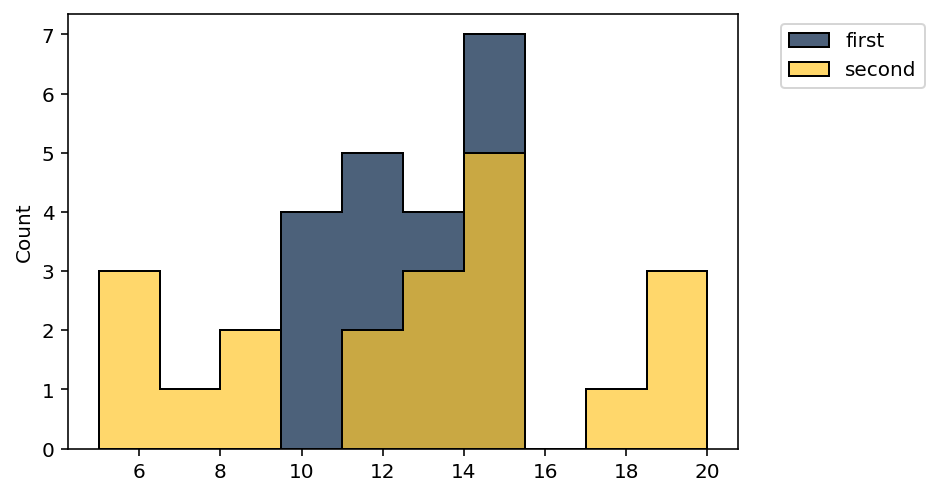

In [38]:
t = Table().with_columns("first",ns,"second",ms)
t.hist(normed=False)

In [39]:
ns = [randrange(1,10) for _ in range(8)]
ns

[8, 3, 4, 4, 9, 7, 5, 5]

In [40]:
import statistics
print(min(pizza_table.where("type","classic").column("price")))
print(max(pizza_table.where("type","classic").column("price")))
print(max(pizza_table.where("type","classic").column("price")))


9.75
35.95
35.95


In [41]:
statistics.stdev(pizza_table.where("type","classic").column("price"))

3.9534707587147326

In [42]:
statistics.stdev(pizza_table.where("size","L").column("price"))


1.5220649979585543

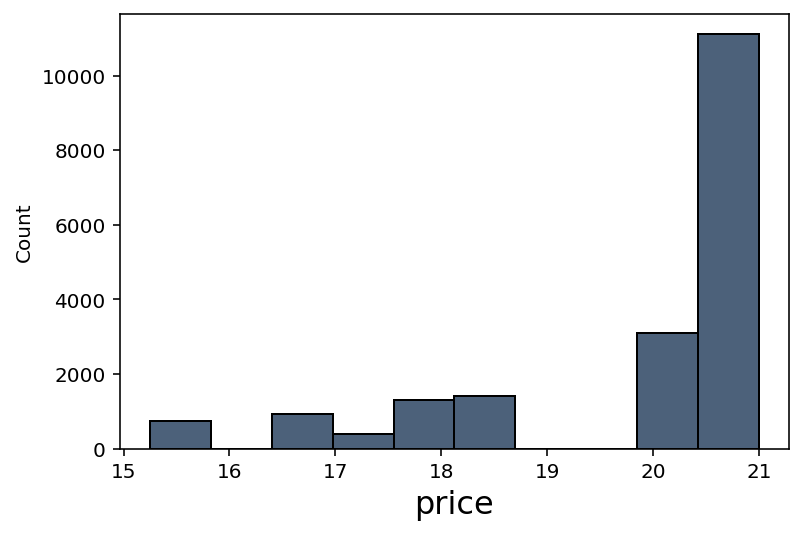

In [43]:
pizza_table.where("size","L").select("price").hist(normed=False)


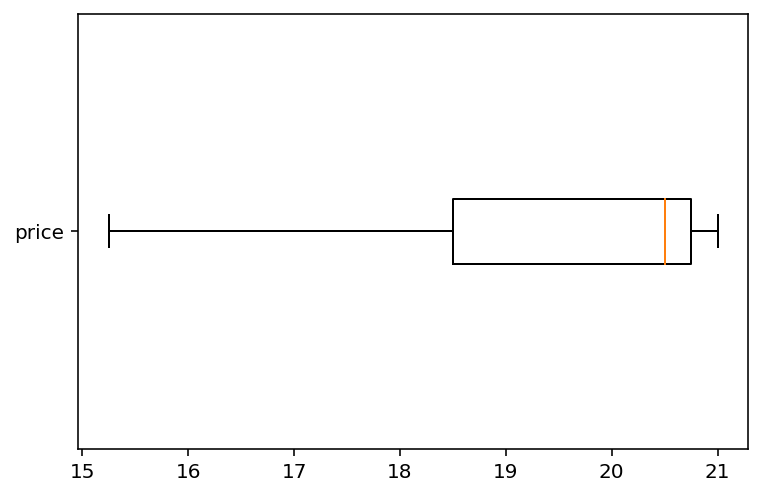

In [44]:
pizza_table.where("size","L").select("price").boxplot(vert=False)


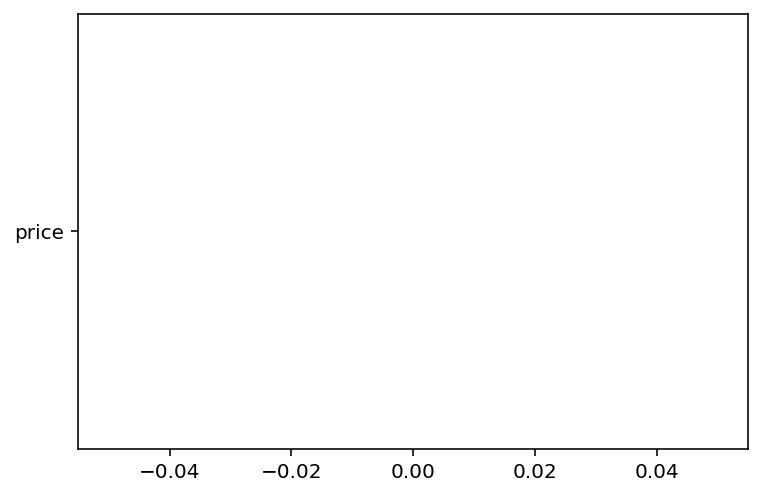

In [45]:
pizza_table.where("type","L").select("price").boxplot(vert=False)


In [46]:
statistics.mean([12,6,10,9,4,10,798,13,5,3])

87

In [47]:
statistics.mean([12,6,10,9,4,10,13,5,3])


8

In [48]:
xls = pizza_table.where("type","veggie").column("price")
max(xls)-min(xls)

9.0

In [49]:
first = [13, 13, 12, 10, 10, 14, 12, 11, 10, 14, 15, 10, 11, 13, 14, 14, 14, 15, 14, 11]
second = [19, 12, 13, 9, 15, 5, 7, 12, 9, 14, 8, 20, 19, 15, 13, 8, 14, 14, 7, 17]

In [50]:
print(statistics.mean(first))
print(statistics.mode(first))
print(statistics.median(first))
print(statistics.mean(second))
print(statistics.mode(second))
print(statistics.median(second))

12.5
14
13.0
12.5
14
13.0


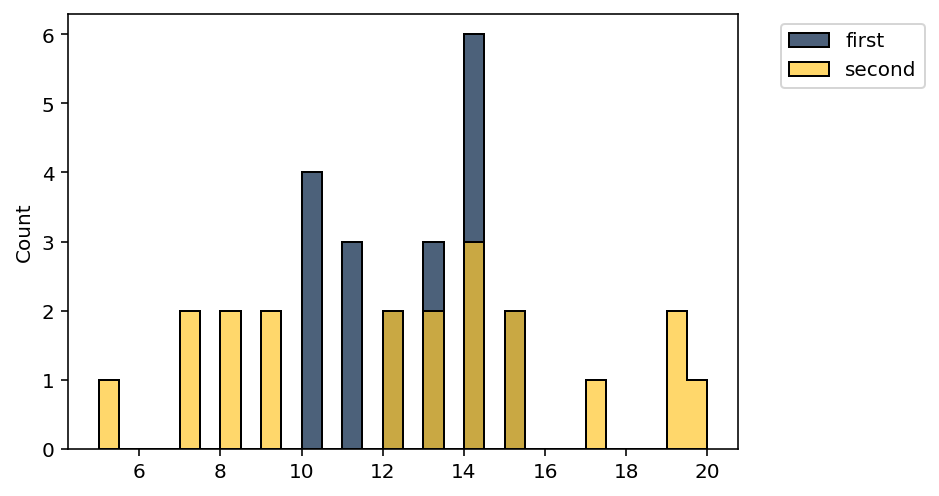

In [51]:
t = Table().with_columns("first",first,"second",second)
t.hist(normed=False,bins=30)

In [52]:
from random import random
def correlated_pair(slope):
    seed = random() # produces a randomly-chosen float between 0 and 1
    x = seed*5
    y = seed*5*slope-1+2*random()
    return [x,y]

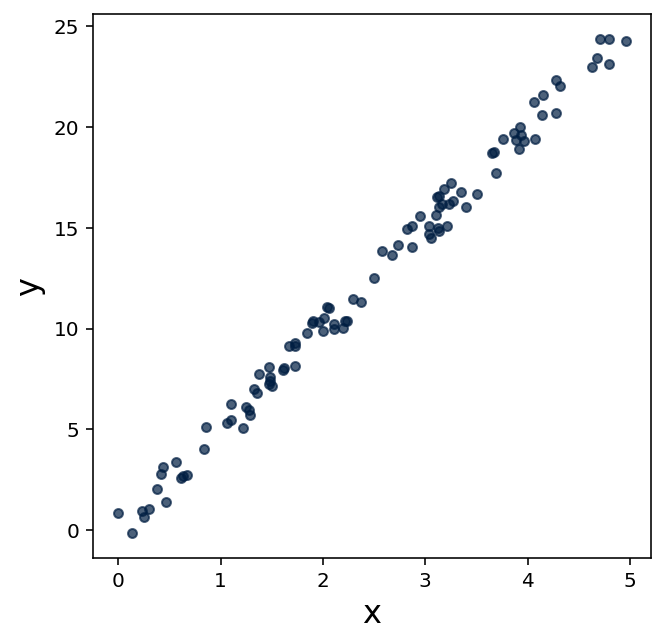

In [53]:
correlated_table = Table(["x","y"]) # empty table with columns x,y
for _ in range(100): # do the following 100 times
    correlated_table = correlated_table.with_row(correlated_pair(5))
correlated_table.scatter("x","y")

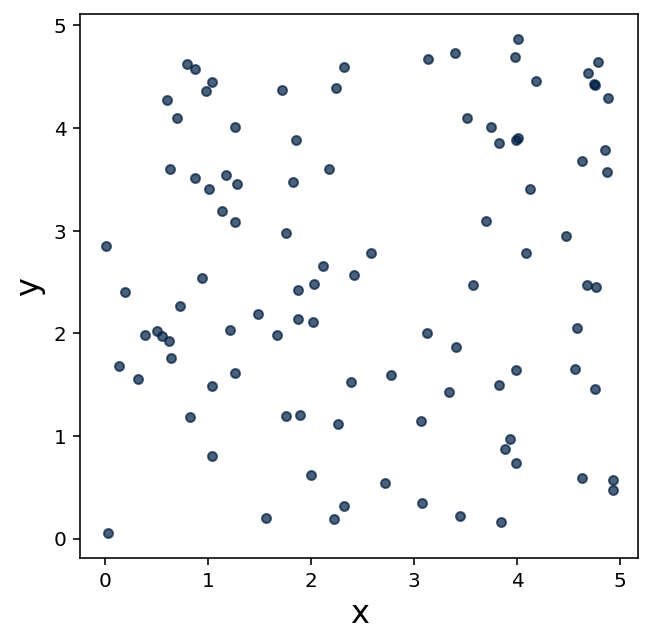

In [54]:
uncorrelated_table = Table(["x","y"]) # empty table with columns x,y
for _ in range(100): # do the following 100 times
    uncorrelated_table = uncorrelated_table.with_row([5*random(),5*random()])
uncorrelated_table.scatter("x","y")


In [55]:
def with_correlated_columns(self,num_rows=100,x_range=5,slope=1,noise=1):
    from random import random
    table = self.select().with_columns("x",[],"y",[])
    for _ in range(num_rows):
        seed = random()
        x = seed*x_range
        y = seed*x_range*slope
        y = y + (-1+2*random())*noise
        table = table.with_row([x,y])
    return table
def correlation(self,col1_name,col2_name):
    import statistics
    # get column arrays
    col1 = self.column(col1_name)
    col2 = self.column(col2_name)
    # standardize units
    col1_s = (col1 - statistics.mean(col1))/statistics.stdev(col1)
    col2_s = (col2 - statistics.mean(col2))/statistics.stdev(col2)
    # correlation is the mean product of standard units
    return statistics.mean(col1_s*col2_s)
setattr(Table,"with_correlated_columns",with_correlated_columns)
setattr(Table,"correlation",correlation)

x,y
1.08288,1.56121
3.37347,3.30036
0.94669,0.127397
3.03844,2.65673
2.38818,3.32373
1.05831,0.923263
1.76857,1.28912
4.5818,3.63767
0.399303,0.350774
0.6496,0.391331


0.9118754268932201

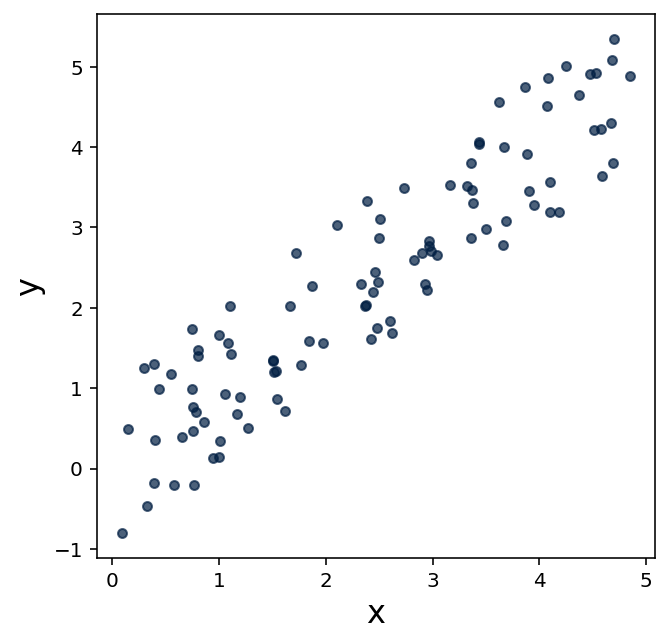

In [56]:
t = Table().with_correlated_columns()
t.show(10)
t.scatter("x")
t.correlation("x","y")

x,y
0.230158,7.46128
4.41918,13.8362
4.4887,3.23348
3.55357,3.3284
0.646487,-1.44001
2.17228,11.2994
4.51023,9.70496
1.90086,10.7412
2.85496,10.2183
2.90005,7.16063


0.19836241924818426

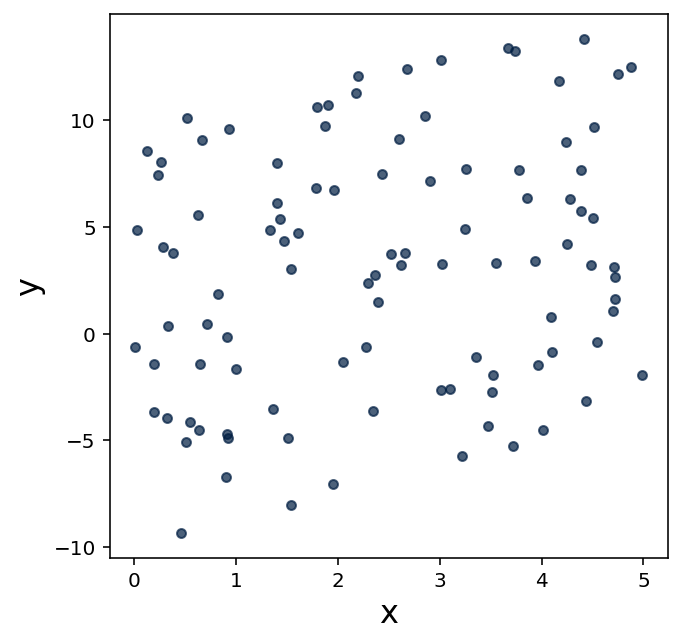

In [57]:
t = Table().with_correlated_columns(noise=10)
t.show(10)
t.scatter("x")
t.correlation("x","y")

In [58]:
testing_table.where("Size",are.above(0)).where("PlcmtScore",are.above(0)).correlation("Size","PlcmtScore")

0.008929184674834327

In [59]:
testing_table.where("SATM",are.above(0)).where("PlcmtScore",are.above(0)).correlation("SATM","PlcmtScore")


0.6635111133709052

In [60]:
testing_table.where("ACTM",are.above(0)).where("PlcmtScore",are.above(0)).correlation("ACTM","PlcmtScore")


0.7959305462064413

In [61]:
Table().with_correlated_columns(slope=3).correlation("x","y")

0.9812369387388364

In [62]:
Table().with_correlated_columns(x_range=10,slope=-2).correlation("x","y")

-0.9858456443603003

In [63]:
Table().with_correlated_columns(noise=5,slope=2).correlation("x","y")

0.682721661165012

In [64]:
Table().with_correlated_columns(noise=100,slope=-4).correlation("x","y")

0.04200852686347203

-0.16083982777043915

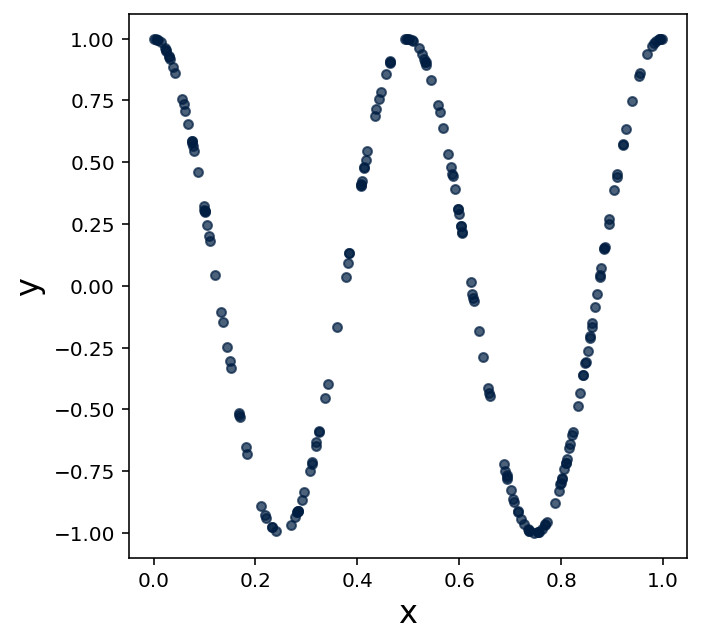

In [65]:
cos_table = Table(["x","y"])
for _ in range(200):
    from random import random
    from math import cos
    seed = random()
    cos_table = cos_table.with_row([seed,cos(12.6*seed)])
cos_table.scatter("x")
cos_table.correlation("x","y")

0.6312379989799679

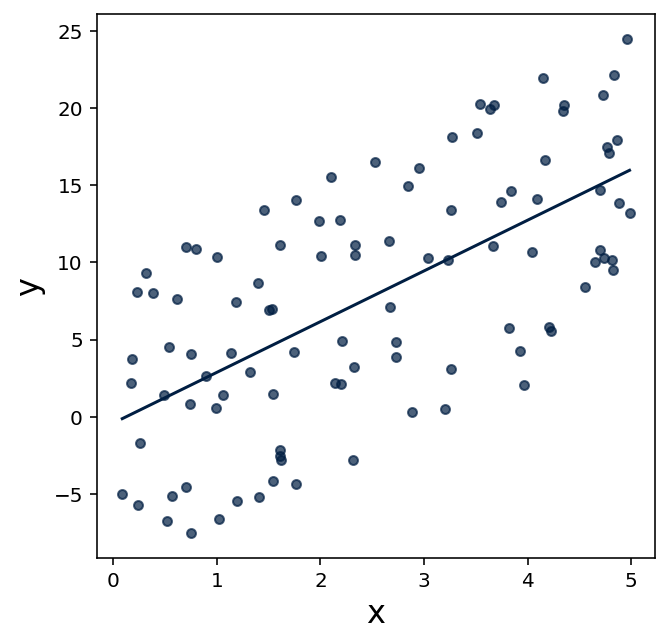

In [66]:
noisy_table = Table().with_correlated_columns(noise=10,slope=3)
noisy_table.scatter("x",fit_line=True)
noisy_table.correlation("x","y")

0.9821785955086297

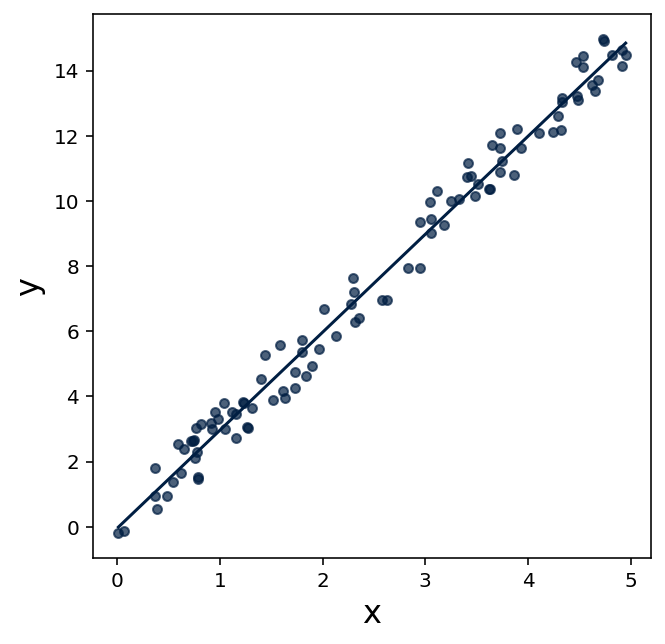

In [67]:
clean_table = Table().with_correlated_columns(noise=1,slope=3)
clean_table.scatter("x",fit_line=True)
clean_table.correlation("x","y")


0.23086092228304306

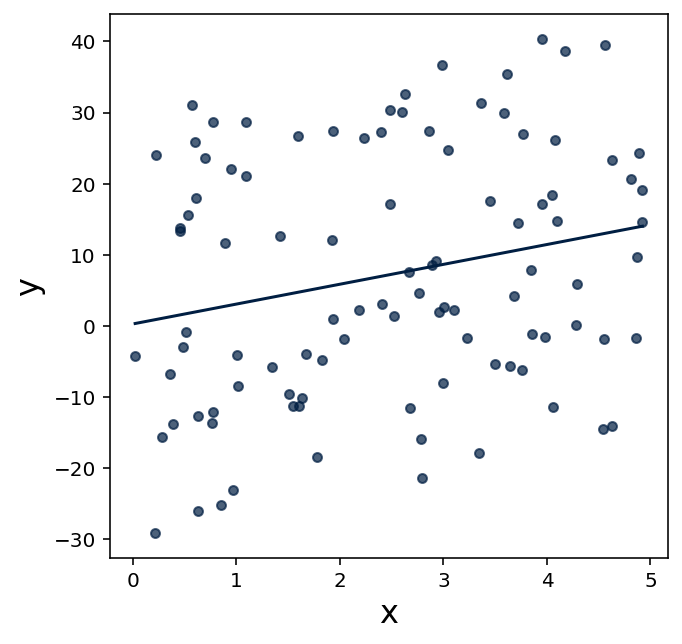

In [68]:
noisiest_table = Table().with_correlated_columns(noise=30,slope=3)
noisiest_table.scatter("x",fit_line=True)
noisiest_table.correlation("x","y")


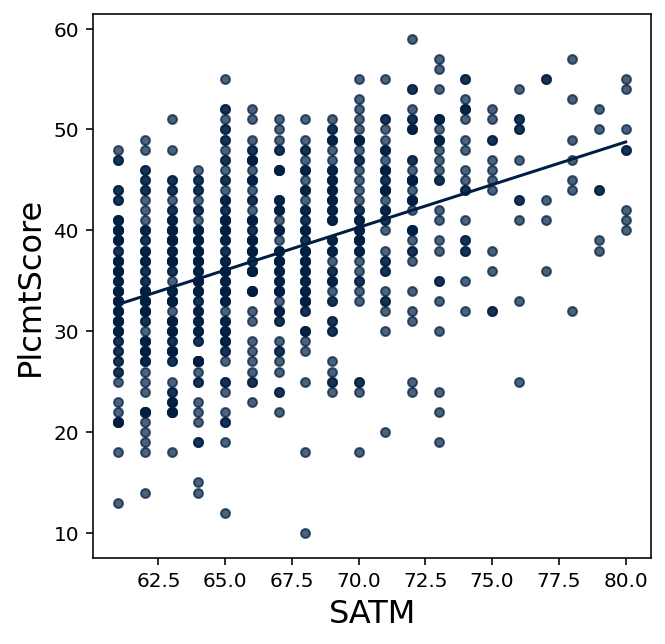

In [69]:
testing_table.where("PlcmtScore",are.above(0)).where("SATM",are.above(60)).select("SATM","PlcmtScore").scatter("SATM",fit_line=True)

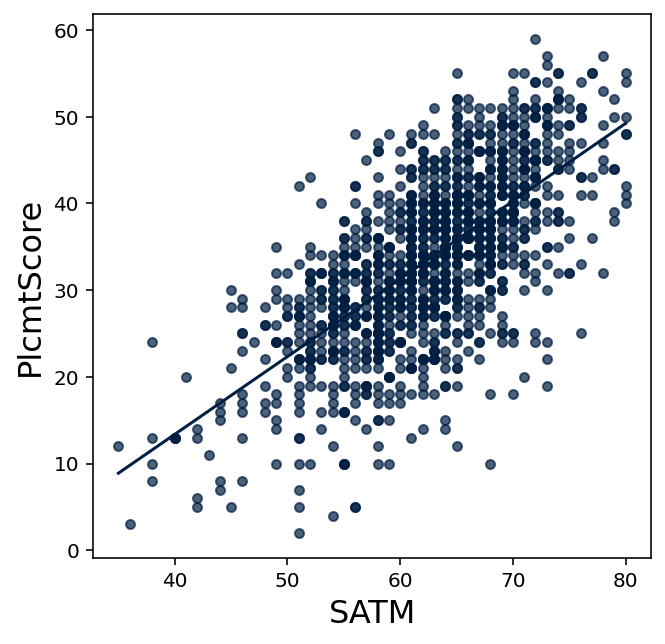

In [70]:
testing_table.where("PlcmtScore",are.above(0)).where("SATM",are.above(0)).select("SATM","PlcmtScore").with_row([40,13]).scatter("SATM",fit_line=True)


0.516044507770107

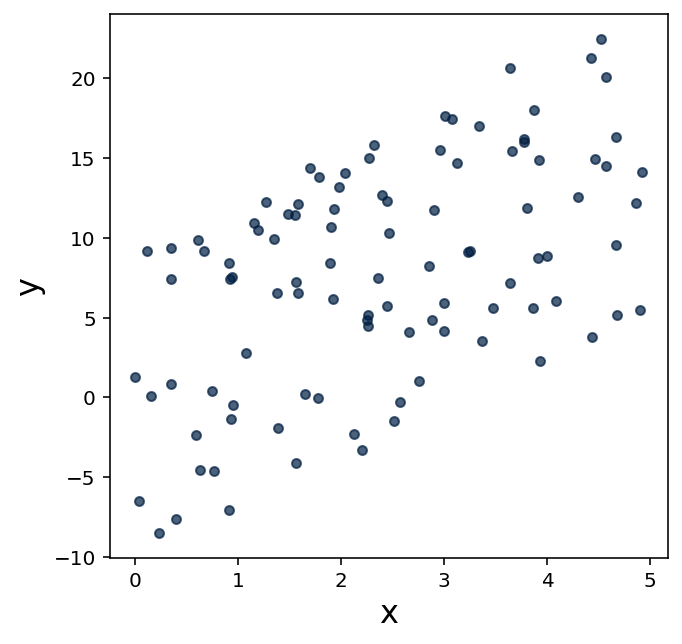

In [75]:
t = Table().with_correlated_columns(noise=10,slope=3)
t.scatter("x")
t.correlation("x","y")


-0.9216310177645121

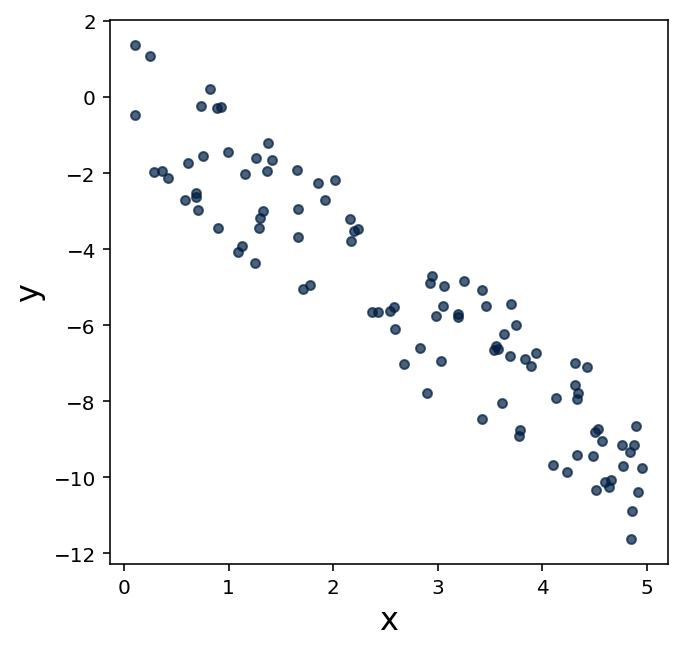

In [76]:
t = Table().with_correlated_columns(noise=2,slope=-2)
t.scatter("x")
t.correlation("x","y")


0.24500478246822505

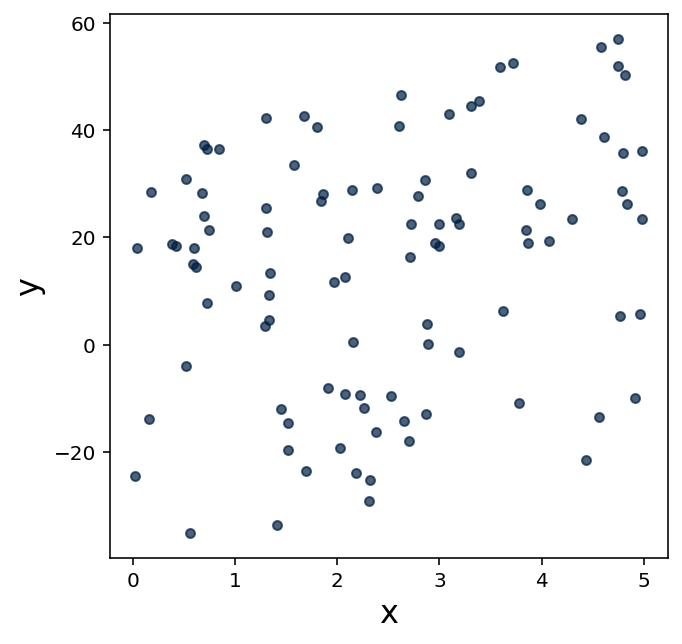

In [77]:
t = Table().with_correlated_columns(noise=40,slope=4)
t.scatter("x")
t.correlation("x","y")
